Data succesfully loaded!


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 2)              │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,933 (23.18 KB)

 Trainable params: 5,928 (23.16 KB)

 Non-trainable params: 5 (24.00 B)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.3267 - mae: 0.4255 - val_loss: 0.1863 - val_mae: 0.3095
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2767 - mae: 0.3921 - val_loss: 0.1763 - val_mae: 0.2995
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2565 - mae: 0.3748 - val_loss: 0.1679 - val_mae: 0.2912
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2479 - mae: 0.3724 - val_loss: 0.1589 - val_mae: 0.2821
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2563 - mae: 0.3637 - val_loss: 0.1500 - val_mae: 0.2727
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2750 - mae: 0.3806 - val_loss: 0.1413 - val_mae: 0.2627
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2478 - mae: 0.3589 - val_loss: 0.1338 - val_mae: 0.2560
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2104 - mae: 0.3383 - val_loss: 0.1276 - val_mae: 0.2534
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1914 - mae: 

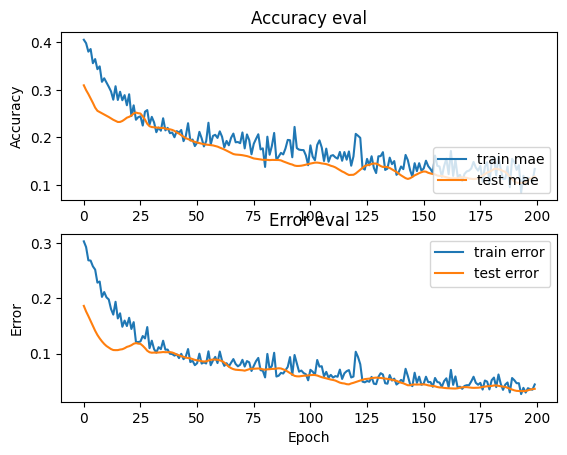

Modello salvato come Synth_model_2x6_9.h5
Modello salvato come Synth_model_2x6_9.keras!


In [5]:
# leggiamo i dati nel JSON file e adattiamoli per il modello
# questo modello implementa una regressione multivariata -- ossia con molteplici uscite,
# questo non è un classificatore e quindi in genere non si usa un layer softmax
# e in teoria non servirebbe specificare una f.ne di attivazione
# mae: Mean Absolute Error ha senso per la regressione
# mentre l'accuracy ha senso per la classificazione

import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Normalization

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs"""
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["mae"], label="train mae")
    axs[0].plot(history.history["val_mae"], label="test mae")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()



with open("file_synth_9x9.json", "r") as f:
    data = json.load(f)

X = np.array(data["bidim"])  # shape (100, 2)
#print("shape di X", X.shape)
y = np.array(data["multidim"])  # shape (100, 9)
print("Data succesfully loaded!")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

#print("X.shape[1]", X.shape[1])

normalizer = Normalization(input_shape=(X.shape[1],))  # definizione input_shape
normalizer.adapt(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)



# Definisco il modello
model = keras.Sequential([
    # Normalization layer
    normalizer,

    # Livello di input (2) + primo layer
    keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    
    # Primo hidden layer
    keras.layers.Dense(64, activation='relu'),
    #keras.layers.Dense(10, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    #keras.layers.Dropout(0.3),

    # Secondo hidden layer
    #keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(20, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    
    # Terzo hidden layer
    keras.layers.Dense(10, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),

    # Layer di output (20 neuroni), con activation lineare se vuoi valori liberi
    # (oppure 'sigmoid' se sai che gli output dovranno essere in [0,1], ecc.)
    keras.layers.Dense(6, activation='linear')
])


# Compilo il modello
optimiser=keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimiser,
    loss='mean_squared_error',
    metrics=['mae']
)

# Stampiamo una descrizione
model.summary()

# facciamo il training
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=200, 
          batch_size= 4, 
          verbose=1)

plot_history(history)


# 8) Salvataggio del modello
model.save("Synth_model_2x6_9.h5")  
print("Modello salvato come Synth_model_2x6_9.h5")

model.save("Synth_model_2x6_9.keras")
print("Modello salvato come Synth_model_2x6_9.keras!")